# import needed libraries 

In [142]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# load data & preprocessing

In [75]:
# Load the Iris dataset
iris = load_iris()

# Convert to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Map the target values to the species names
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#overviwe about data
print("frist 10 rows in data")
print(iris_df.tail(10))
print()

#show data information
print("information about data")
print(iris_df.info())
print()

# describe the numerical data
print("data stastical describtion")
print(iris_df.describe())
print()

frist 10 rows in data
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
140                6.7               3.1                5.6               2.4   
141                6.9               3.1                5.1               2.3   
142                5.8               2.7                5.1               1.9   
143                6.8               3.2                5.9               2.3   
144                6.7               3.3                5.7               2.5   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
140  virginica  
141  virginica  
142  virginica  
143  virginica  
1

# show types of iris and its propotion 

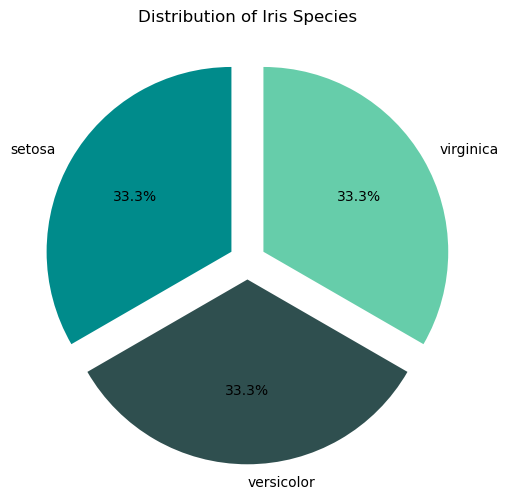

In [76]:
# Count the number of samples for each species
species_counts = iris_df['species'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['DarkCyan','DarkSlateGrey','MediumAquaMarine'], explode=[0.1,0.1,0.1]
       )
plt.title('Distribution of Iris Species')
plt.show()

# let's see the relation between features according species

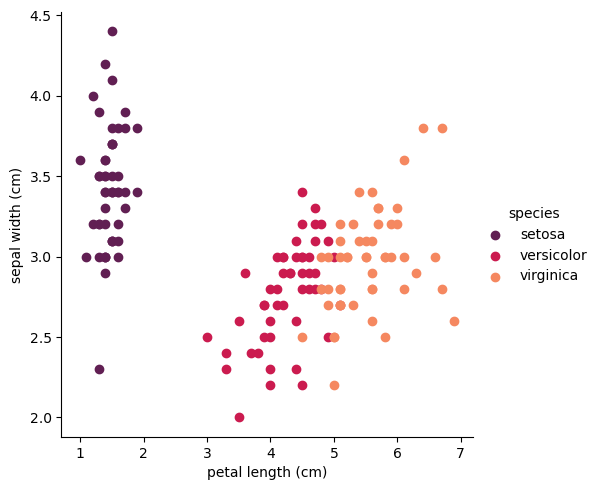

In [77]:
#Scatter plot of different species
sns.FacetGrid(iris_df, hue ='species', height = 5 ,palette = 'rocket'
             ).map(plt.scatter,"petal length (cm)","sepal width (cm)").add_legend()
plt.show()

C:\Users\Mega Store\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


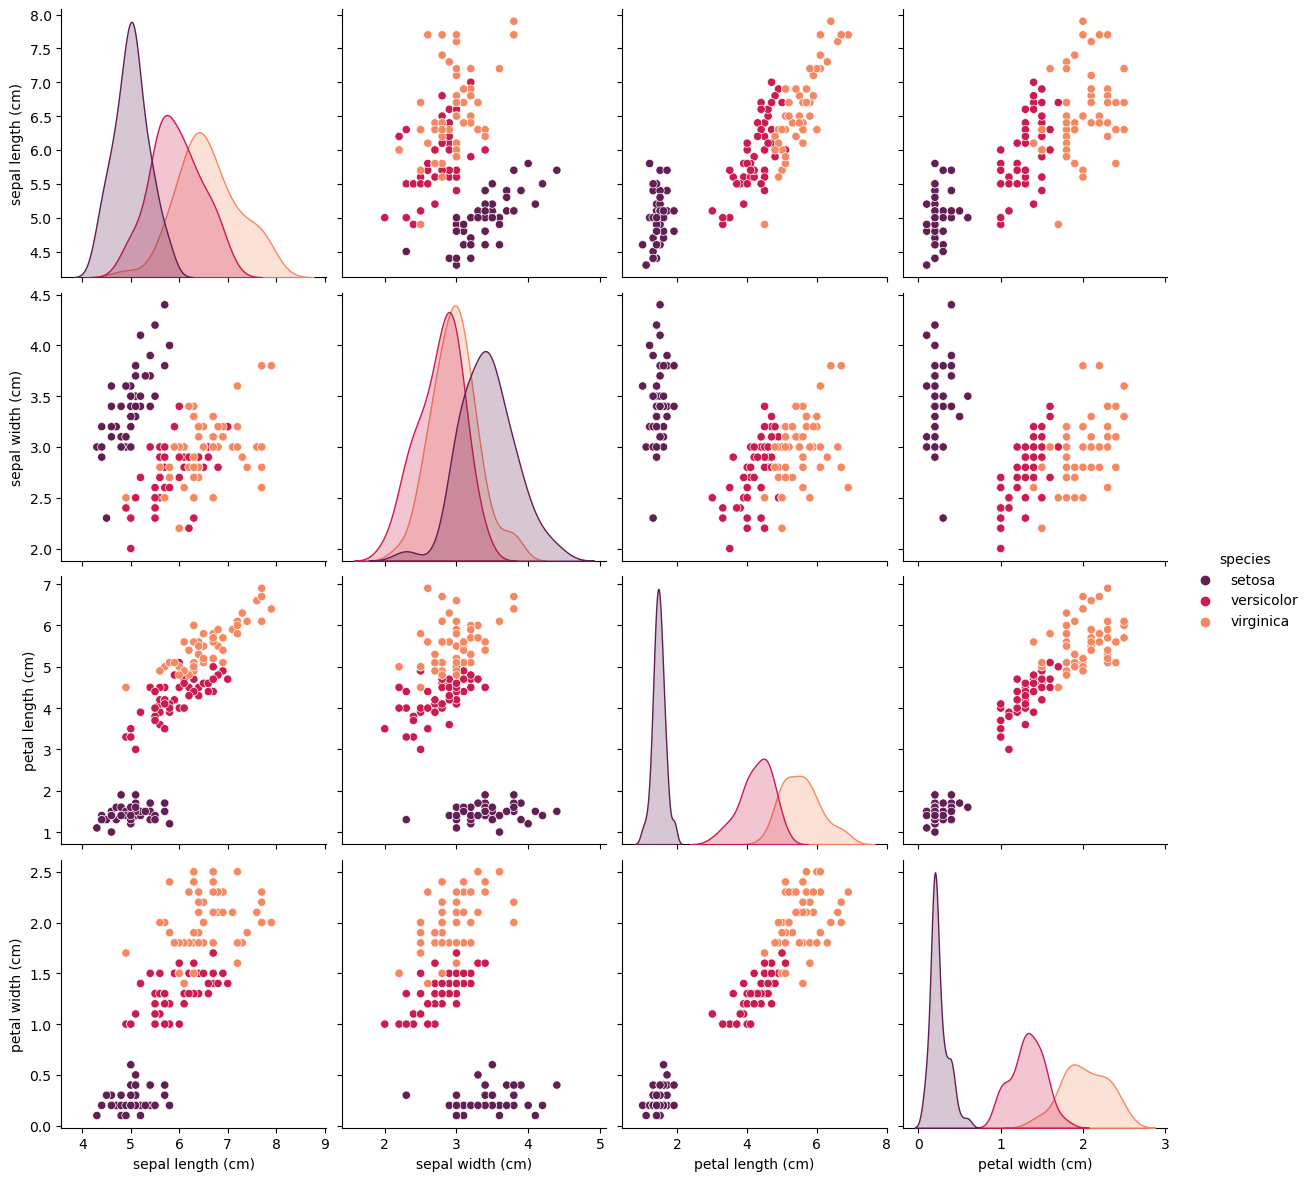

In [92]:
sns.pairplot(iris_df, hue="species", size=3, diag_kind="kde" , palette = 'rocket')
plt.show()

# split data 

In [151]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns='species'), iris_df['species'],
                                                    test_size=0.35, random_state=42)

# build the model

In [152]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0 , min_samples_split=2)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [153]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      0.94      0.94        17
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        53
   macro avg       0.96      0.96      0.96        53
weighted avg       0.96      0.96      0.96        53



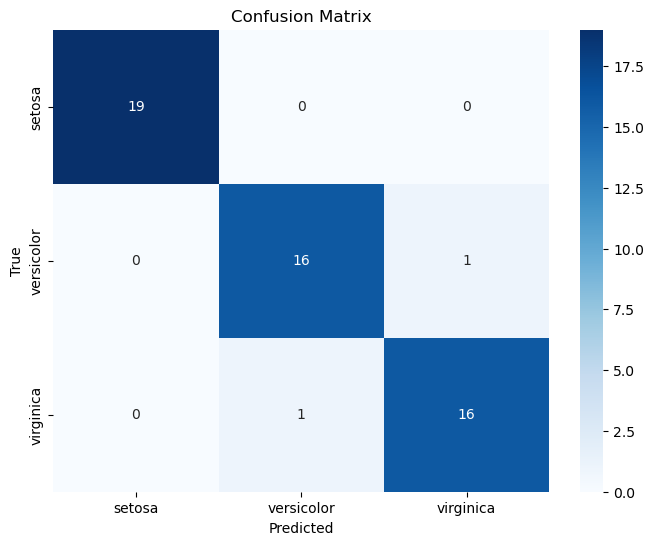

In [154]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

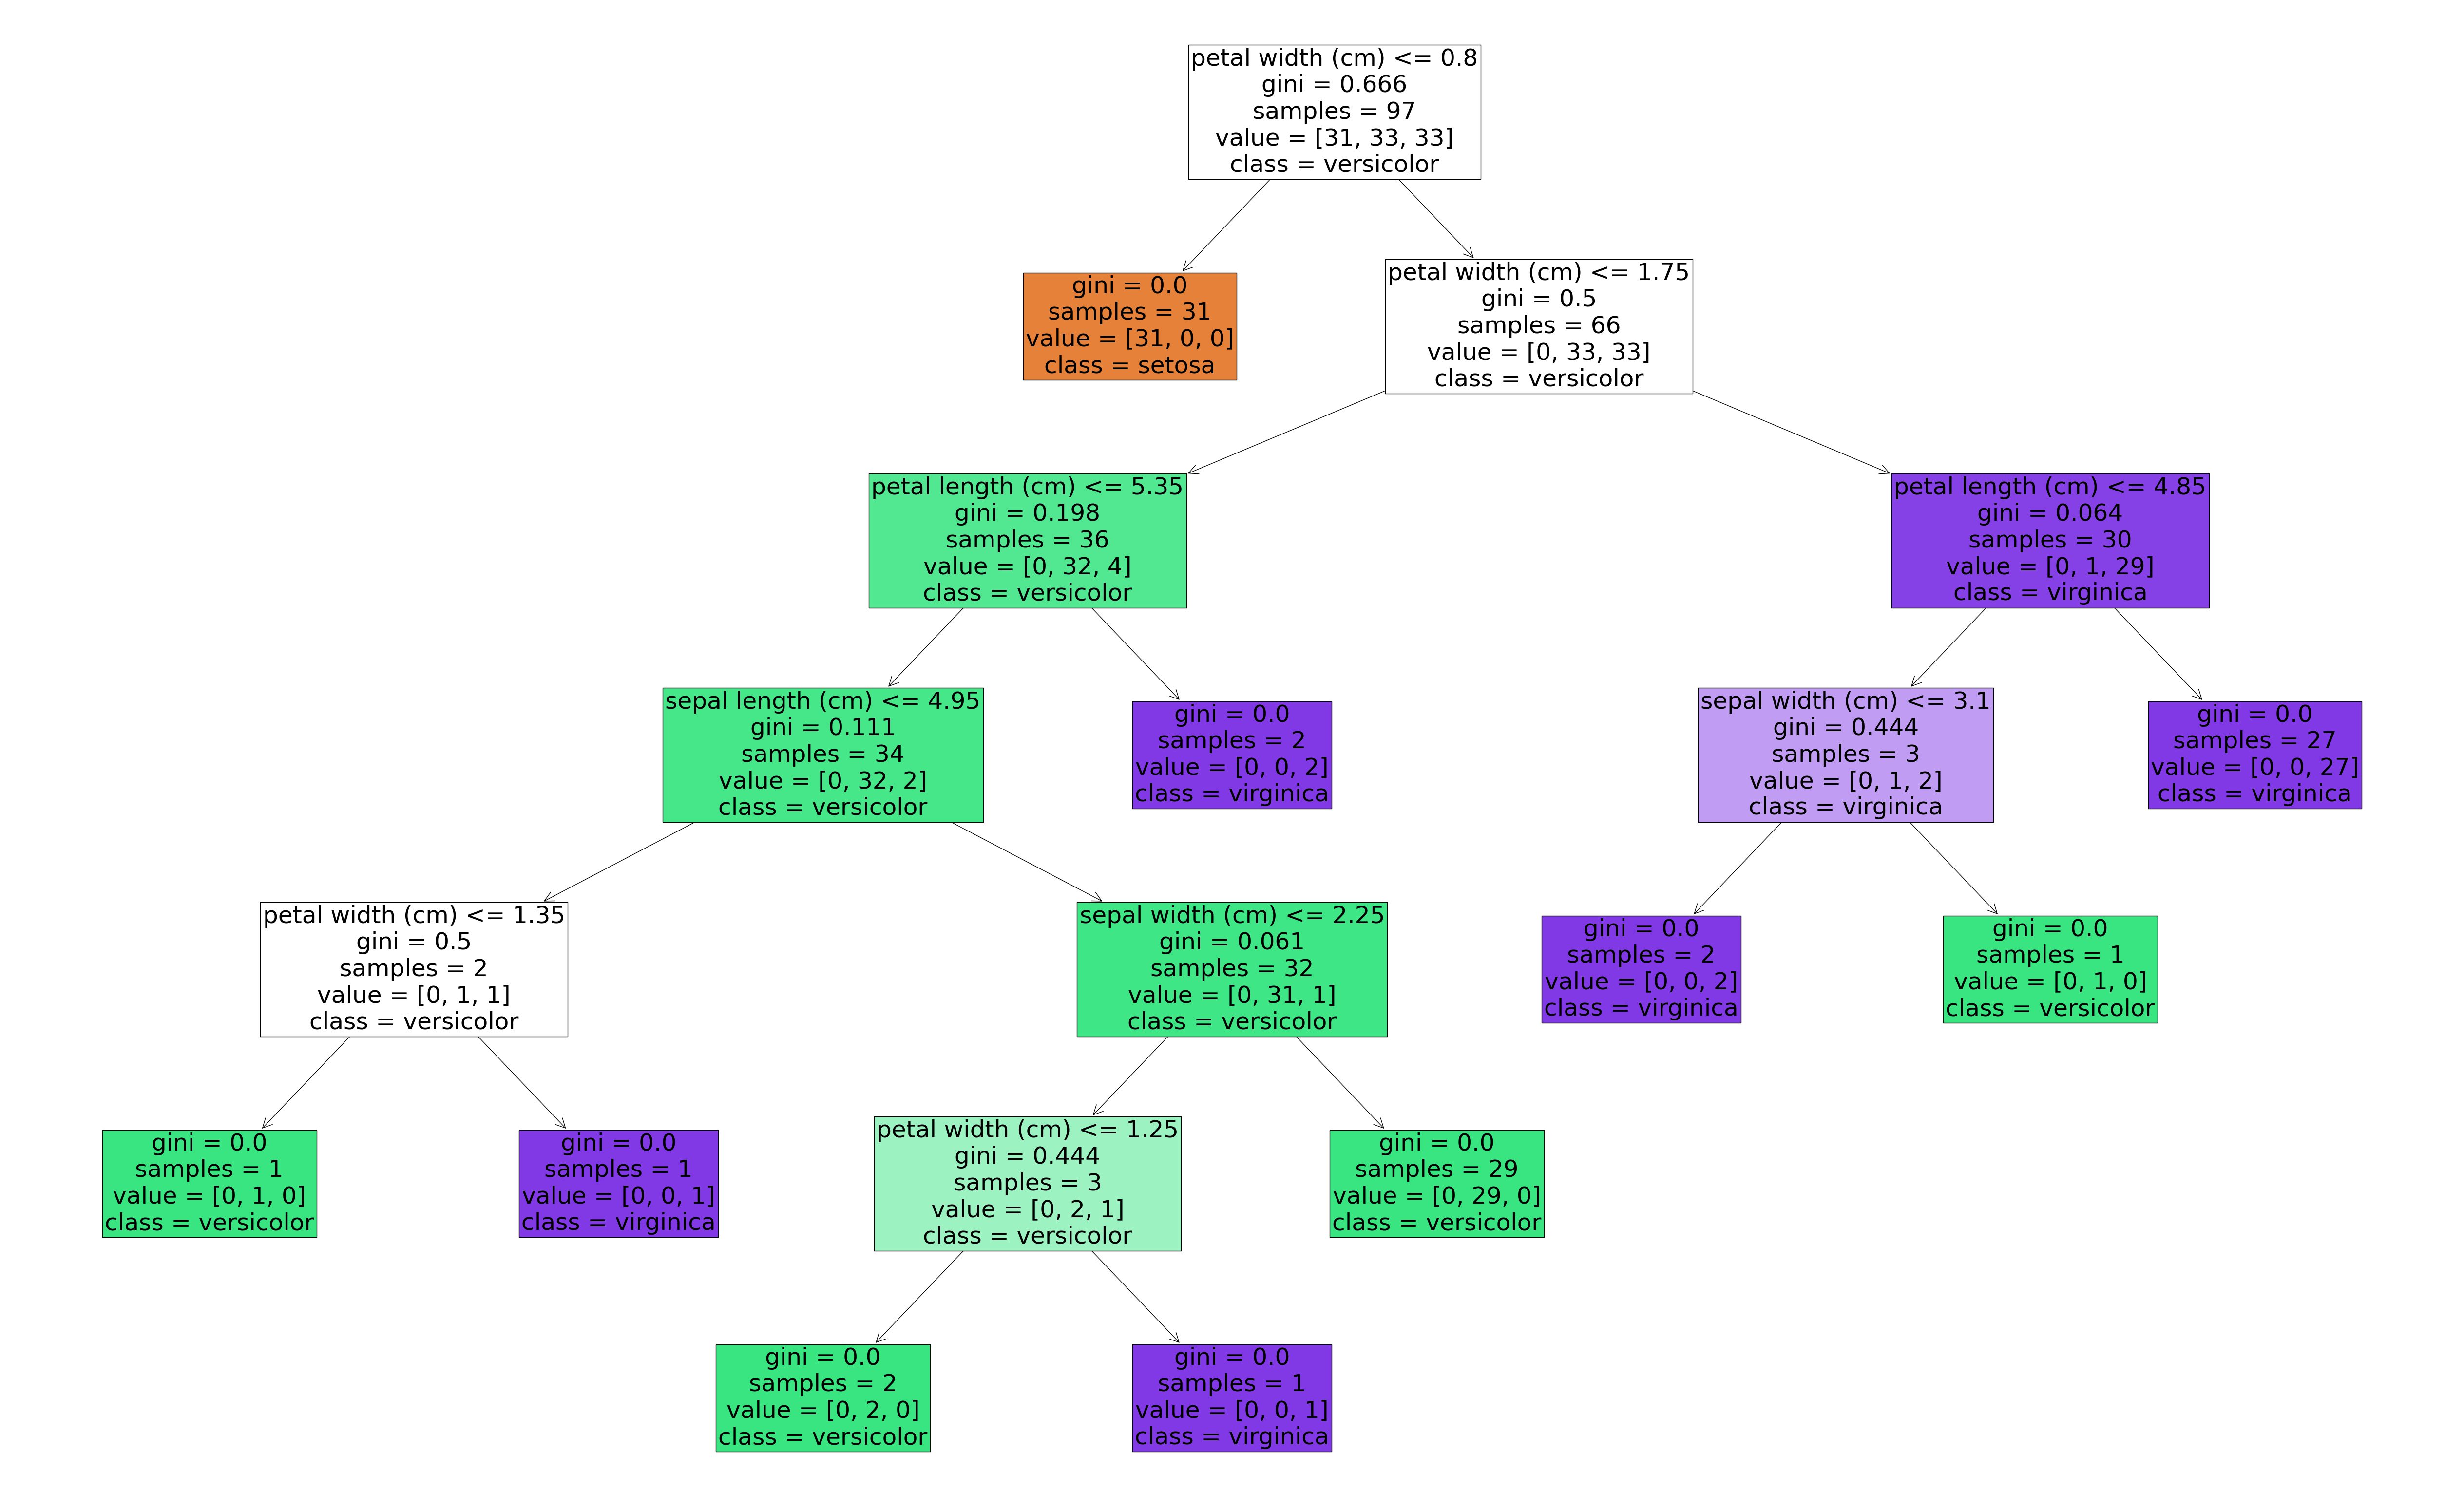

In [155]:
# Plot the decision tree
plt.figure(figsize=(65,40))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names,fontsize=35)
plt.show()